In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt

asthma_data = pd.read_csv('../data/Colorado_EPHT_Asthma_Hospitalization_Data.csv')

In [42]:
asthma_data.head() # Basic EDA

,OBJECTID,COUNTY,RATE,L95CL,U95CL,HOSP,FLAG,YEAR,GENDER,AGE,MEASURE,HEALTHOUTCOMEID,cofips
0,1,Statewide,26.106203,23.594710,28.617696,414.0,2,2004,Female,0-4 years old,Age specific rate,Asthma,8000
1,2,Statewide,5.495734,4.923385,6.068083,354.0,2,2004,Female,15-34 years old,Age specific rate,Asthma,8000
2,3,Statewide,9.473972,8.845805,10.102139,873.0,2,2004,Female,35-64 years old,Age specific rate,Asthma,8000
3,4,Statewide,11.493323,10.298405,12.688240,355.0,2,2004,Female,5-14 years old,Age specific rate,Asthma,8000
4,5,Statewide,14.765810,13.288086,16.243533,383.0,2,2004,Female,65+ years old,Age specific rate,Asthma,8000


In [43]:
asthma_data.describe() # Basic EDA

,OBJECTID,RATE,L95CL,U95CL,HOSP,FLAG,YEAR,cofips
count,20475.000000,15906.000000,15906.000000,15906.000000,15906.000000,20475.000000,20475.000000,20475.000000
mean,10238.000000,5.165746,2.703488,9.526479,41.909342,1.982320,2011.000000,8061.276923
std,5910.767717,11.235832,5.711530,23.966576,223.303713,0.318705,4.320599,37.108860
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2004.000000,8000.000000
25%,5119.500000,0.000000,0.000000,0.000000,0.000000,2.000000,2007.000000,8029.000000
50%,10238.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2011.000000,8061.000000
75%,15356.500000,7.014721,3.437972,11.632122,11.000000,2.000000,2015.000000,8093.000000
max,20475.000000,410.958904,212.348463,843.431308,4795.000000,3.000000,2018.000000,8125.000000


In [35]:
asthma_data.info() # Basic EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20475 entries, 0 to 20474
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OBJECTID         20475 non-null  int64  
 1   COUNTY           20475 non-null  object 
 2   RATE             15906 non-null  float64
 3   L95CL            15906 non-null  float64
 4   U95CL            15906 non-null  float64
 5   HOSP             15906 non-null  float64
 6   FLAG             20475 non-null  int64  
 7   YEAR             20475 non-null  int64  
 8   GENDER           20475 non-null  object 
 9   AGE              17550 non-null  object 
 10  MEASURE          20475 non-null  object 
 11  HEALTHOUTCOMEID  20475 non-null  object 
 12  cofips           20475 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.0+ MB


In [36]:
# Cleaning - ADDED
county_filter = asthma_data[asthma_data["COUNTY"] == "Statewide"]
date_filter = county_filter[county_filter["YEAR"] >= 2010]
age_filter = date_filter[date_filter["AGE"] == "All ages"]
gender_filter = age_filter[age_filter["GENDER"] == "Both genders"]
gender_filter

,OBJECTID,COUNTY,RATE,L95CL,U95CL,HOSP,FLAG,YEAR,GENDER,AGE,MEASURE,HEALTHOUTCOMEID,cofips
125,126,Statewide,8.540033,8.285267,8.794798,4313.0,2,2010,Both genders,All ages,Age specific rate,Asthma,8000
143,144,Statewide,8.245951,7.997406,8.494495,4225.0,2,2011,Both genders,All ages,Age specific rate,Asthma,8000
161,162,Statewide,7.361452,7.128243,7.594660,3825.0,2,2012,Both genders,All ages,Age specific rate,Asthma,8000
179,180,Statewide,7.001720,6.775944,7.227496,3692.0,2,2013,Both genders,All ages,Age specific rate,Asthma,8000
197,198,Statewide,7.433386,7.202502,7.664270,3979.0,2,2014,Both genders,All ages,Age specific rate,Asthma,8000
215,216,Statewide,5.811436,5.609188,6.013684,3170.0,2,2015,Both genders,All ages,Age specific rate,Asthma,8000
233,234,Statewide,4.326233,4.153113,4.499353,2398.0,2,2016,Both genders,All ages,Age specific rate,Asthma,8000
251,252,Statewide,4.192986,4.023672,4.362300,2355.0,2,2017,Both genders,All ages,Age specific rate,Asthma,8000
269,270,Statewide,3.924976,3.762283,4.087669,2235.0,2,2018,Both genders,All ages,Age specific rate,Asthma,8000


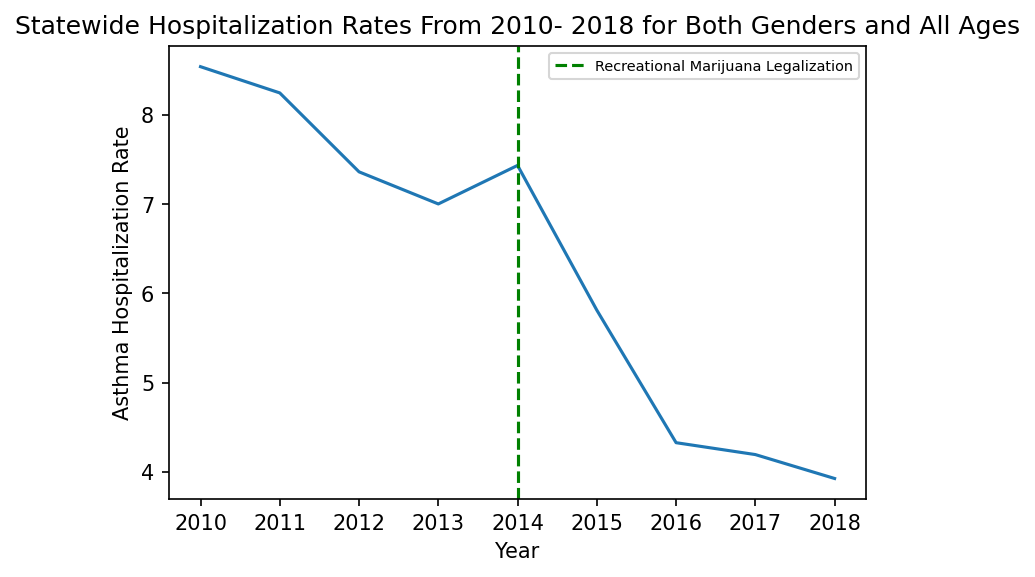

In [37]:
fig, ax = plt.subplots(dpi=150)
plt.plot(gender_filter["YEAR"], gender_filter["RATE"])
plt.axvline(x=2014, ls="--", color="green", label="Recreational Marijuana Legalization")
plt.title("Statewide Hospitalization Rates From 2010- 2018 for Both Genders and All Ages")
plt.xlabel("Year")
plt.ylabel("Asthma Hospitalization Rate")
plt.legend(loc="best", fontsize="x-small")
plt.show()

In [38]:
minus_rate_zero = asthma_data[asthma_data["RATE"] != 0] # Removes 8448 rows
minus_rate_nan = minus_rate_zero.dropna(subset=["RATE"])
minus_age_nan = minus_rate_nan.dropna(subset=["AGE"])
minus_rate_zero

,OBJECTID,COUNTY,RATE,L95CL,U95CL,HOSP,FLAG,YEAR,GENDER,AGE,MEASURE,HEALTHOUTCOMEID,cofips
0,1,Statewide,26.106203,23.594710,28.617696,414.0,2,2004,Female,0-4 years old,Age specific rate,Asthma,8000
1,2,Statewide,5.495734,4.923385,6.068083,354.0,2,2004,Female,15-34 years old,Age specific rate,Asthma,8000
2,3,Statewide,9.473972,8.845805,10.102139,873.0,2,2004,Female,35-64 years old,Age specific rate,Asthma,8000
3,4,Statewide,11.493323,10.298405,12.688240,355.0,2,2004,Female,5-14 years old,Age specific rate,Asthma,8000
4,5,Statewide,14.765810,13.288086,16.243533,383.0,2,2004,Female,65+ years old,Age specific rate,Asthma,8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20465,20466,Yuma,6.058126,2.394582,11.392596,7.0,2,2015,Both genders,NaN,Age adjusted rate,Asthma,8125
20467,20468,Yuma,NaN,NaN,NaN,NaN,2,2016,Male,NaN,Age adjusted rate,Asthma,8125
20468,20469,Yuma,NaN,NaN,NaN,NaN,2,2016,Both genders,NaN,Age adjusted rate,Asthma,8125
20473,20474,Yuma,NaN,NaN,NaN,NaN,2,2018,Male,NaN,Age adjusted rate,Asthma,8125


In [39]:
county_filter_yuma = asthma_data[asthma_data["COUNTY"] == "Yuma"]
# date_filter = county_filter[county_filter["YEAR"] >= 2010]
# age_filter = date_filter[date_filter["AGE"] == "All ages"]
# gender_filter = age_filter[age_filter["GENDER"] == "Both genders"]
# gender_filter
county_filter1.describe()

NameError: name 'county_filter1' is not defined

In [45]:
county_filter_arapahoe = asthma_data[asthma_data["COUNTY"] == "Arapahoe"]
date_filter_arapahoe = county_filter_arapahoe[county_filter_arapahoe["YEAR"] >= 2010]
age_filter_arapahoe = date_filter_arapahoe[date_filter_arapahoe["AGE"] == "All ages"]
gender_filter_arapahoe = age_filter_arapahoe[age_filter_arapahoe["GENDER"] == "Both genders"]
gender_filter_arapahoe

,OBJECTID,COUNTY,RATE,L95CL,U95CL,HOSP,FLAG,YEAR,GENDER,AGE,MEASURE,HEALTHOUTCOMEID,cofips
935,936,Arapahoe,10.298894,9.469689,11.128099,592.0,3,2010,Both genders,All ages,Age specific rate,Asthma,8005
953,954,Arapahoe,10.787229,9.946660,11.627797,632.0,3,2011,Both genders,All ages,Age specific rate,Asthma,8005
971,972,Arapahoe,9.773942,8.980931,10.566953,583.0,3,2012,Both genders,All ages,Age specific rate,Asthma,8005
989,990,Arapahoe,9.929540,9.138040,10.721040,604.0,3,2013,Both genders,All ages,Age specific rate,Asthma,8005
1007,1008,Arapahoe,10.228220,9.431819,11.024622,633.0,3,2014,Both genders,All ages,Age specific rate,Asthma,8005
1025,1026,Arapahoe,6.659215,6.022551,7.295878,420.0,3,2015,Both genders,All ages,Age specific rate,Asthma,8005
1043,1044,Arapahoe,6.090792,5.485698,6.695886,389.0,3,2016,Both genders,All ages,Age specific rate,Asthma,8005
1061,1062,Arapahoe,5.401336,4.833987,5.968685,348.0,3,2017,Both genders,All ages,Age specific rate,Asthma,8005
1079,1080,Arapahoe,5.250682,4.694336,5.807027,342.0,3,2018,Both genders,All ages,Age specific rate,Asthma,8005


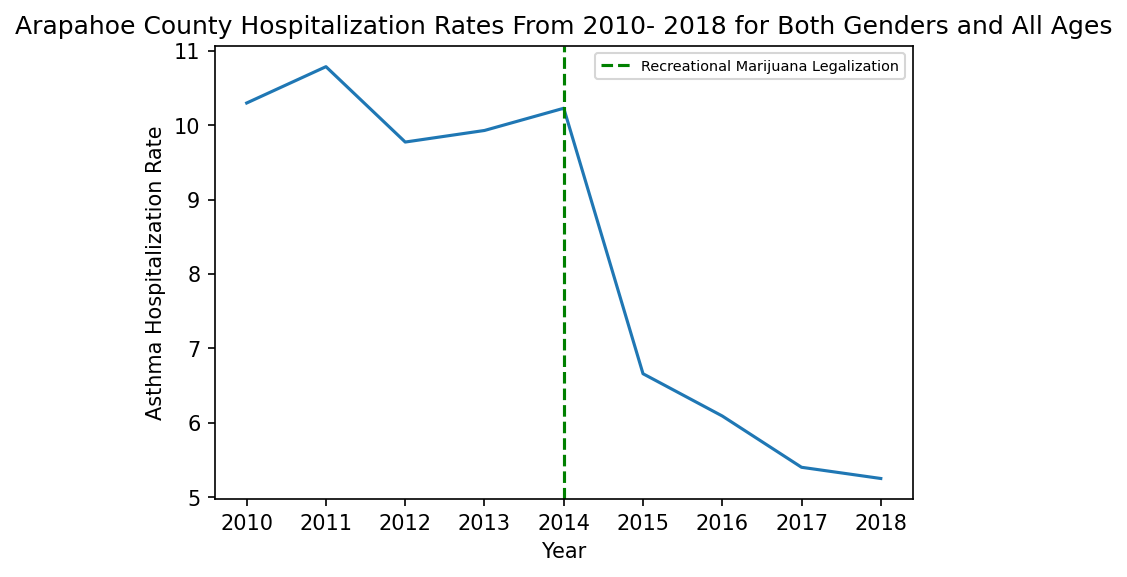

In [44]:
fig, ax = plt.subplots(dpi=150)
plt.plot(gender_filter_arapahoe["YEAR"], gender_filter_arapahoe["RATE"])
plt.axvline(x=2014, ls="--", color="green", label="Recreational Marijuana Legalization")
plt.title("Arapahoe County Hospitalization Rates From 2010- 2018 for Both Genders and All Ages")
plt.xlabel("Year")
plt.ylabel("Asthma Hospitalization Rate")
plt.legend(loc="best", fontsize="x-small")
plt.show()

In [78]:
county_filter_arapahoe = asthma_data[asthma_data["COUNTY"] == "Arapahoe"]
date_filter_arapahoe = county_filter_arapahoe[county_filter_arapahoe["YEAR"] >= 2010]
age1_filter_arapahoe = date_filter_arapahoe[date_filter_arapahoe["AGE"] == "0-4 years old"]
male_filter_arapahoe = age1_filter_arapahoe[age1_filter_arapahoe["GENDER"] == "Male"]
male_filter_arapahoe

,OBJECTID,COUNTY,RATE,L95CL,U95CL,HOSP,FLAG,YEAR,GENDER,AGE,MEASURE,HEALTHOUTCOMEID,cofips
924,925,Arapahoe,41.054039,32.395005,49.713072,86.0,2,2010,Male,0-4 years old,Age specific rate,Asthma,8005
942,943,Arapahoe,43.609527,34.668905,52.550149,91.0,2,2011,Male,0-4 years old,Age specific rate,Asthma,8005
960,961,Arapahoe,33.839312,25.925376,41.753247,70.0,2,2012,Male,0-4 years old,Age specific rate,Asthma,8005
978,979,Arapahoe,39.803893,31.205671,48.402115,82.0,2,2013,Male,0-4 years old,Age specific rate,Asthma,8005
996,997,Arapahoe,31.573323,23.909720,39.236926,65.0,2,2014,Male,0-4 years old,Age specific rate,Asthma,8005
1014,1015,Arapahoe,28.754912,21.489384,36.020440,60.0,2,2015,Male,0-4 years old,Age specific rate,Asthma,8005
1032,1033,Arapahoe,24.308866,17.645292,30.972439,51.0,2,2016,Male,0-4 years old,Age specific rate,Asthma,8005
1050,1051,Arapahoe,30.671906,23.168823,38.174990,64.0,3,2017,Male,0-4 years old,Age specific rate,Asthma,8005
1068,1069,Arapahoe,23.590583,16.993016,30.188150,49.0,2,2018,Male,0-4 years old,Age specific rate,Asthma,8005


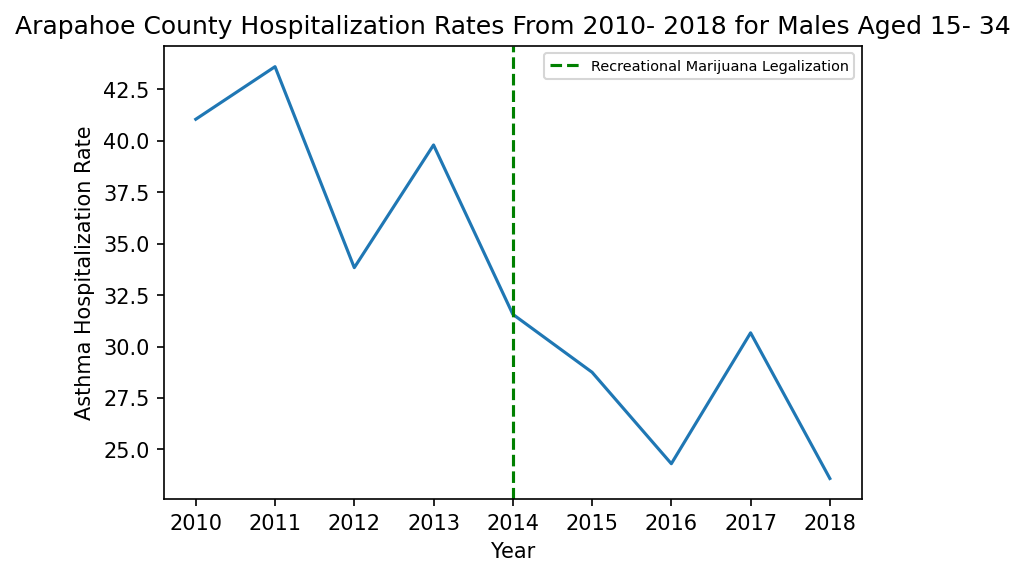

In [79]:
fig, ax = plt.subplots(dpi=150)
plt.plot(male_filter_arapahoe["YEAR"], male_filter_arapahoe["RATE"])
plt.axvline(x=2014, ls="--", color="green", label="Recreational Marijuana Legalization")
plt.title("Arapahoe County Hospitalization Rates From 2010- 2018 for Males Aged 15- 34")
plt.xlabel("Year")
plt.ylabel("Asthma Hospitalization Rate")
plt.legend(loc="best", fontsize="x-small")
plt.show()

In [48]:
asthma_data[asthma_data["COUNTY"] == "Alamosa"]

,OBJECTID,COUNTY,RATE,L95CL,U95CL,HOSP,FLAG,YEAR,GENDER,AGE,MEASURE,HEALTHOUTCOMEID,cofips
540,541,Alamosa,NaN,NaN,NaN,NaN,2,2004,Female,0-4 years old,Age specific rate,Asthma,8003
541,542,Alamosa,NaN,NaN,NaN,NaN,2,2004,Female,15-34 years old,Age specific rate,Asthma,8003
542,543,Alamosa,25.026814,10.062077,51.564803,7.0,2,2004,Female,35-64 years old,Age specific rate,Asthma,8003
543,544,Alamosa,0.000000,0.000000,0.000000,0.0,2,2004,Female,5-14 years old,Age specific rate,Asthma,8003
544,545,Alamosa,0.000000,0.000000,0.000000,0.0,2,2004,Female,65+ years old,Age specific rate,Asthma,8003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,17681,Alamosa,4.281232,1.149263,9.434850,4.0,2,2017,Male,NaN,Age adjusted rate,Asthma,8003
17681,17682,Alamosa,4.184945,1.654522,7.869219,7.0,2,2017,Both genders,NaN,Age adjusted rate,Asthma,8003
17682,17683,Alamosa,NaN,NaN,NaN,NaN,2,2018,Female,NaN,Age adjusted rate,Asthma,8003
17683,17684,Alamosa,NaN,NaN,NaN,NaN,2,2018,Male,NaN,Age adjusted rate,Asthma,8003


In [49]:
minus_age_nan.describe()

,OBJECTID,RATE,L95CL,U95CL,HOSP,FLAG,YEAR,cofips
count,5773.000000,5773.000000,5773.000000,5773.000000,5773.000000,5773.000000,5773.000000,5773.000000
mean,7713.313182,11.997865,6.219373,22.559978,76.777412,1.977828,2010.479300,8053.683354
std,5081.784064,15.893575,7.921851,35.373183,269.333457,0.504169,4.252079,37.006651
min,1.000000,0.338860,0.084189,0.867615,3.000000,1.000000,2004.000000,8000.000000
25%,3300.000000,4.318489,1.857657,7.308695,5.000000,2.000000,2007.000000,8021.000000
50%,6786.000000,8.014233,3.935573,13.643536,13.000000,2.000000,2010.000000,8047.000000
75%,11790.000000,14.362657,8.005491,24.739238,48.000000,2.000000,2014.000000,8083.000000
max,17496.000000,410.958904,212.348463,843.431308,4795.000000,3.000000,2018.000000,8125.000000


In [50]:
four_years_pre_legalization = minus_age_nan[(minus_age_nan["YEAR"] <= 2013) & 
                                 (minus_age_nan["YEAR"] >= 2010) &
                                 (minus_age_nan["COUNTY"] != "Statewide") &
                                 (minus_age_nan["GENDER"] != "Both genders") &
                                 (minus_age_nan["AGE"] != "All ages")]
four_years_pre_legalization

,OBJECTID,COUNTY,RATE,L95CL,U95CL,HOSP,FLAG,YEAR,GENDER,AGE,MEASURE,HEALTHOUTCOMEID,cofips
378,379,Adams,26.347568,18.903624,33.791513,48.0,2,2010,Female,0-4 years old,Age specific rate,Asthma,8001
379,380,Adams,5.746769,3.895566,7.597973,37.0,2,2010,Female,15-34 years old,Age specific rate,Asthma,8001
380,381,Adams,12.889419,10.437216,15.341621,106.0,3,2010,Female,35-64 years old,Age specific rate,Asthma,8001
381,382,Adams,15.066786,10.974673,19.158899,52.0,2,2010,Female,5-14 years old,Age specific rate,Asthma,8001
382,383,Adams,21.307827,15.088752,27.526902,45.0,2,2010,Female,65+ years old,Age specific rate,Asthma,8001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17179,17180,Weld,2.481020,1.189746,4.562684,10.0,2,2013,Male,15-34 years old,Age specific rate,Asthma,8123
17180,17181,Weld,2.795081,1.528097,4.689670,14.0,2,2013,Male,35-64 years old,Age specific rate,Asthma,8123
17181,17182,Weld,13.603528,8.655718,18.551338,29.0,2,2013,Male,5-14 years old,Age specific rate,Asthma,8123
17182,17183,Weld,8.197332,4.092079,14.667292,11.0,2,2013,Male,65+ years old,Age specific rate,Asthma,8123


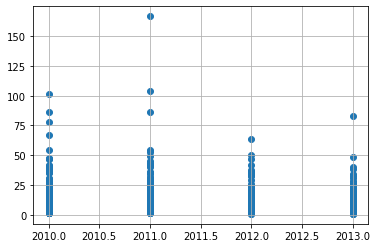

In [77]:
fig, ax = plt.subplots()
plt.scatter(four_years_pre_legalization["YEAR"], four_years_pre_legalization["RATE"])

plt.show()

In [52]:
len(pd.unique(four_years_pre_legalization["COUNTY"]))

39

In [53]:
pre_len = len(four_years_pre_legalization["RATE"])
pre_mean = four_years_pre_legalization["RATE"].mean()
pre_variance = four_years_pre_legalization["RATE"].var()
pre_std = sqrt(pre_variance)
pre_len, pre_mean, pre_variance, pre_std

(599, 13.473957085535192, 213.54834854294612, 14.613293555627564)

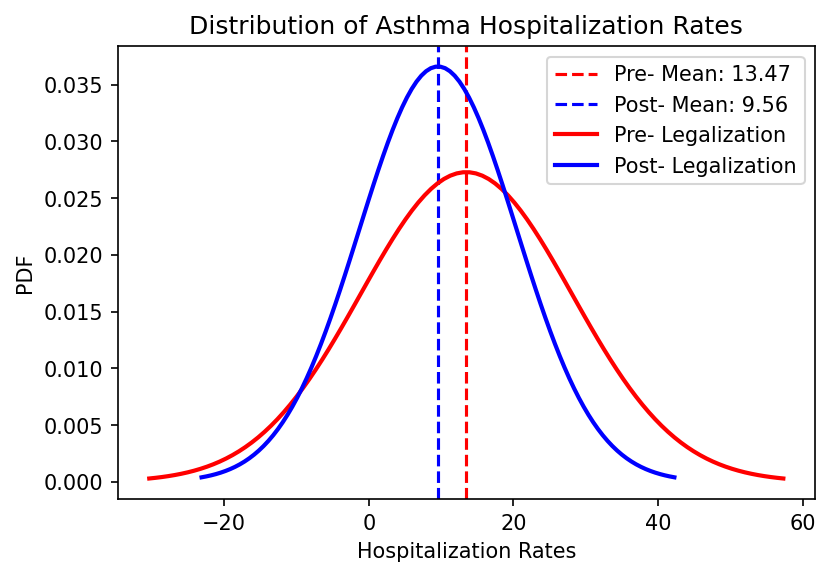

In [54]:
pre_norm_dist = stats.norm(pre_mean, pre_std)
fig, ax = plt.subplots(dpi=150)
pre_x = np.linspace(pre_mean - 3*pre_std, pre_mean + 3*pre_std, 100)
post_x = np.linspace(post_mean - 3*post_std, post_mean + 3*post_std, 100)
plt.title("Distribution of Asthma Hospitalization Rates")
plt.xlabel("Hospitalization Rates")
plt.ylabel("PDF")
plt.axvline(x=pre_mean, ls="--", color="red", label=f"Pre- Mean: {round(pre_mean, 2)}")
plt.axvline(x=post_mean, ls="--", color="blue", label=f"Post- Mean: {round(post_mean, 2)}")
plt.plot(pre_x, pre_norm_dist.pdf(pre_x), linewidth=2, color="red", label="Pre- Legalization")
plt.plot(post_x, post_norm_dist.pdf(post_x), linewidth=2, color="blue", label="Post- Legalization")
plt.legend(loc="best")
plt.savefig("") # file path to images folder
plt.show()

In [55]:
four_years_post_legalization = minus_age_nan[(minus_age_nan["YEAR"] <= 2017) & 
                                 (minus_age_nan["YEAR"] >= 2014) &
                                 (minus_age_nan["COUNTY"] != "Statewide") &
                                 (minus_age_nan["GENDER"] != "Both genders") &
                                 (minus_age_nan["AGE"] != "All ages")]
four_years_post_legalization

,OBJECTID,COUNTY,RATE,L95CL,U95CL,HOSP,FLAG,YEAR,GENDER,AGE,MEASURE,HEALTHOUTCOMEID,cofips
450,451,Adams,20.465011,13.786618,27.143403,36.0,2,2014,Female,0-4 years old,Age specific rate,Asthma,8001
451,452,Adams,6.659865,4.756475,8.563256,47.0,2,2014,Female,15-34 years old,Age specific rate,Asthma,8001
452,453,Adams,8.247469,6.356275,10.138664,73.0,2,2014,Female,35-64 years old,Age specific rate,Asthma,8001
453,454,Adams,19.983257,15.434716,24.531798,74.0,3,2014,Female,5-14 years old,Age specific rate,Asthma,8001
454,455,Adams,7.953235,4.468962,11.437508,20.0,2,2014,Female,65+ years old,Age specific rate,Asthma,8001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17248,17249,Weld,3.063100,1.124104,6.667079,6.0,2,2017,Female,65+ years old,Age specific rate,Asthma,8123
17250,17251,Weld,8.945344,4.289640,16.450806,10.0,1,2017,Male,0-4 years old,Age specific rate,Asthma,8123
17251,17252,Weld,1.081666,0.351214,2.524247,5.0,2,2017,Male,15-34 years old,Age specific rate,Asthma,8123
17252,17253,Weld,2.698910,1.510559,4.451441,15.0,2,2017,Male,35-64 years old,Age specific rate,Asthma,8123


In [56]:
post_len = len(four_years_post_legalization["RATE"])
post_mean = four_years_post_legalization["RATE"].mean()
post_variance = four_years_post_legalization["RATE"].var()
post_std = sqrt(post_variance)
post_len, post_mean, post_variance, post_std

(518, 9.55923398914578, 118.7487256517085, 10.897188887585115)

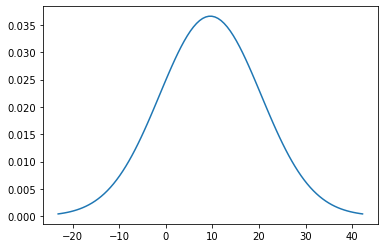

In [57]:
post_norm_dist = stats.norm(post_mean, post_std)
fig, ax = plt.subplots()
post_x = np.linspace(post_mean - 3*post_std, post_mean + 3*post_std, 100)
plt.plot(post_x, post_norm_dist.pdf(post_x))
plt.show()

In [59]:
# Welches t-test
def welch_test_statistic(pre_len, pre_mean, pre_variance, post_len, post_mean, post_variance):
    numerator = pre_mean - post_mean
    denominator = (pre_variance / pre_len) + (post_variance / post_len)
    return numerator / sqrt(denominator)

In [60]:
test_statistic = welch_test_statistic(pre_len, pre_mean, pre_variance, post_len, post_mean, post_variance)
print(f"Welches Test Statistic: {test_statistic}")

Welches Test Statistic: 5.114979344843798


In [61]:
def welch_satterwithe_df(sample1_len, sample1_variance, sample2_len, sample2_variance):
    df = (((sample1_variance/ sample1_len + sample2_variance/ sample2_len)**(2.0)) /
          ((sample1_variance/ sample1_len)**(2.0)/(sample1_len - 1) + (sample2_variance/ sample2_len)**(2.0)/(sample2_len - 1)))
    return df

In [62]:
df = welch_satterwithe_df(pre_len, pre_variance, post_len, post_variance)
print(f"Welch Satterwithe Degrees of Freedom: {df}")

Welch Satterwithe Degrees of Freedom: 1092.0391852554076


Text(0.5, 1.0, "Distribution of Welch's Test Statistic Under the Null Hypothesis")

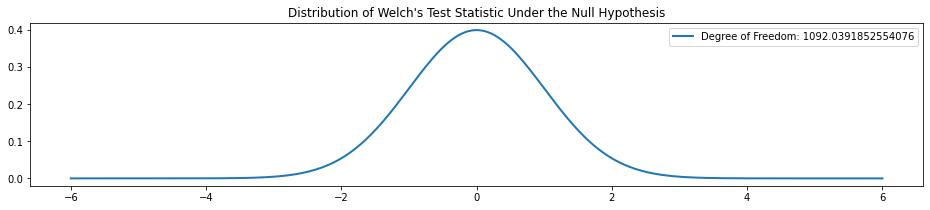

In [69]:
x = np.linspace(-6, 6, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label=f"Degree of Freedom: {df}")
ax.legend()
ax.set_title("Distribution of Welch's Test Statistic Under the Null Hypothesis")

Text(0.5, 1.0, "Distribution of Welch's Test Statistic Under the Null Hypothesis")

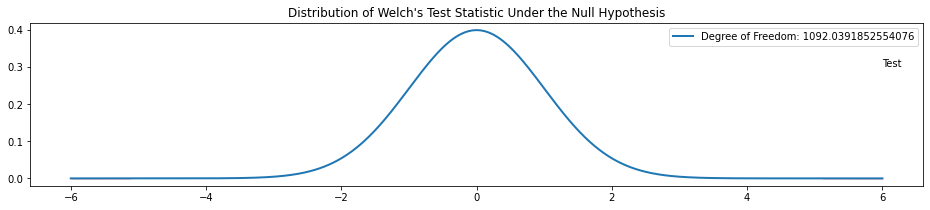

In [76]:
x = np.linspace(-6, 6, num=10000)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(df)
ax.plot(x, students.pdf(x), linewidth=2, label=f"Degree of Freedom: {df}")
_ = ax.fill_between(x, students.pdf(x), where=(x >= test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= -test_statistic), color="red", alpha=0.25)
ax.text(6, 0.3, "Test", size="")
ax.legend()
ax.set_title("Distribution of Welch's Test Statistic Under the Null Hypothesis")

In [67]:
students = stats.t(df)
p_value = 1 - students.cdf(test_statistic)
p_value * 2

3.7040031153345865e-07

#### Two Sided T-Test with stats.ttest_ind

In [66]:
# Prior Distribution
np.random.seed(999)
rvs1 = stats.norm.rvs(loc=pre_mean, scale=pre_std, size=pre_len)
# Post Distribution
rvs2 = stats.norm.rvs(loc=post_mean, scale=post_std, size=post_len)

# stat, p_value1 = stats.ttest_ind(rvs1, rvs2, equal_var=False)
stat, p_value1 = stats.ttest_ind(four_years_pre_legalization["RATE"], four_years_post_legalization["RATE"], equal_var=False)
# stat, p_value1 = stats.ttest_ind(rvs1, rvs2, equal_var=True)
stat, p_value1

(5.114979344843786, 3.7040031165278743e-07)